In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import ResNet50,EfficientNetB0
from tensorflow.keras.applications.resnet50 import preprocess_input
import tensorflow as tf
from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Model
import random
import cv2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

2024-11-06 01:33:29.606166: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-06 01:33:29.757815: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1730856809.825849    1248 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1730856809.845038    1248 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-06 01:33:30.020247: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
from tensorflow.keras.models import load_model
ensemble_model = load_model('./my_model.h5')

I0000 00:00:1730856813.170233    1248 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13553 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4070 Ti SUPER, pci bus id: 0000:01:00.0, compute capability: 8.9


In [3]:
test_path = './dermnet/test'

In [11]:
# Create and fit the LabelEncoder
le = LabelEncoder()
class_names = os.listdir(test_path)  # Get folder names as class names
le.fit(class_names)

# Now proceed with the prediction loop
real_label = []
predicted_class = []

for folder in os.listdir(test_path):
    folder_path = os.path.join(test_path, folder)
    for file in os.listdir(folder_path):
        if file.endswith(':Zone.Identifier'):
            continue
            
        file_path = os.path.join(folder_path, file)
        img = cv2.imread(file_path)
        
        if img is None:
            print(f"Failed to load image: {file_path}")
            continue
            
        img = cv2.resize(img, (224,224))
        img = preprocess_input(np.array([img]))  

        predictions = ensemble_model.predict(img)
        real_label.append(folder)
        predicted_class_index = np.argmax(predictions)
        predicted_class.append(le.classes_[predicted_class_index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━

In [12]:
image='./dermnet/test/Warts Molluscum and other Viral Infections/eczema-herpeticum-12.jpg'
img = cv2.imread(image)  # Read the image from the file
img = cv2.resize(img, (224, 224))  # Resize to the model's input size
img = preprocess_input(img)  # Preprocess like you did during training
img = np.expand_dims(img, axis=0)  # Add batch dimension
predictions = ensemble_model.predict(img)
predicted_class_index = np.argmax(predictions)
predicted_class = le.classes_[predicted_class_index]

print(f'The predicted class for the given image is: {predicted_class}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
The predicted class for the given image is: Psoriasis pictures Lichen Planus and related diseases


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


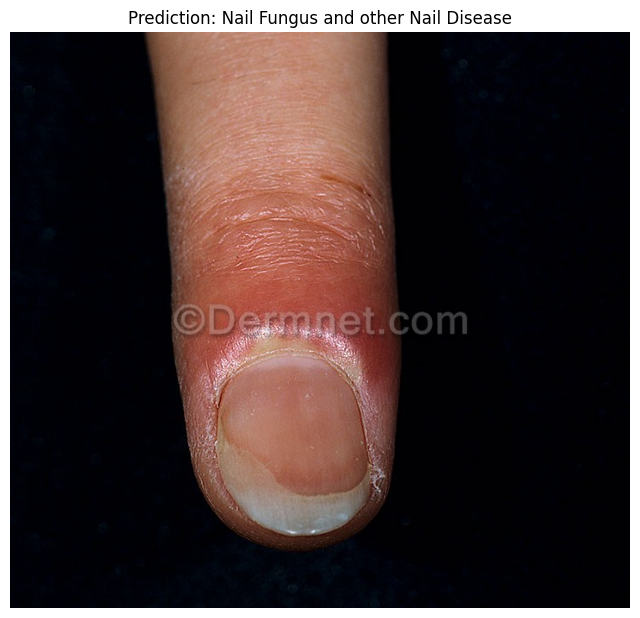

In [17]:
image='./dermnet/test/Nail Fungus and other Nail Disease/acute-paronychia-25.jpg'
img = cv2.imread(image)  # Read the image from the file

# Convert BGR to RGB (cv2 loads in BGR, matplotlib expects RGB)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Make prediction
img_resized = cv2.resize(img, (224, 224))  # Resize to the model's input size
img_preprocessed = preprocess_input(img_resized)  # Preprocess like you did during training
img_batch = np.expand_dims(img_preprocessed, axis=0)  # Add batch dimension
predictions = ensemble_model.predict(img_batch)
predicted_class_index = np.argmax(predictions)
predicted_class = le.classes_[predicted_class_index]

# Display image with prediction
plt.figure(figsize=(8, 8))
plt.imshow(img_rgb)
plt.title(f'Prediction: {predicted_class}')
plt.axis('off')  # Hide axes
plt.show()